# Project Visualizing Real World Data 

## Dinis Oliveira - DATAPT DEC 2019 
### Analysis of Primeira Liga Players and Variables

The goal of this project was to practice interpreting different types of visualizations by collecting relevant information about players from the portuguese professional league during the year of 2019 in order to compare their attributes and analyse the differences between the teams.


## Before your start:

- Read the README.md file
- Follow each step as described in the instructions
- Enjoy the ride!

### 1. Importing Libraries

In [211]:
# Start by importing the table and the necessary libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)

In [2]:
# Import the dataset that is going to be analyzed and set the dataframe options to display all columns

data = pd.read_csv('players.csv')
pd.options.display.max_columns = None

### 2. FIFA19 dataset
#### 2.1 Exploring the dataset

- Before any changes are made, it's important to get a grasp of the dataset's characteristics

In [3]:
data.shape

(18207, 89)

In [4]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [131]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Clean_Value,Clean_Wage
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,110500000.0,565000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,77000000.0,405000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,118500000.0,290000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,72000000.0,260000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,102000000.0,355000.0


#### 2.2 Data Cleaning

- Given the purpose of the project, it's usefull to clean columns that are not relevant for the analysis


In [7]:
cols = ['Unnamed: 0', 'Photo', 'Flag', 'Club Logo', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position']

data = data.drop(cols, axis =1)

- Next, we'll be reformatting a few columns to numerical values so we can use its values in the analysis
- This will allow us to draw conclusions later on related to the columns Wage and Value

In [8]:
def numeric_value(x):
    amount = x.replace('€', '')
    
    # Changing the milions (M) for 1000000's
    if 'M' in amount:
        amount = amount.replace('M', '')
        amount = float(amount)*1000000

    # Changing the thousands (K) for 1000's
    elif 'K' in amount:
        amount = amount.replace('K', '')
        amount = float(amount)*1000
    return float(amount)

In [9]:
data['Clean_Value'] =  data['Value'].apply(numeric_value)

In [10]:
data['Clean_Wage'] =  data['Wage'].apply(numeric_value)

### 3. Data Analysis and Visualization

- For this project, we've selected all the teams from `Primeira Liga`:

- The Primeira Liga, also known as Liga NOS for sponsorship reasons, is the top professional association football division of the Portuguese football league system.

In [14]:
# This league was composed of 16 teams in 2019 and for the sake of the analysis we'll use 14 that are availabe
# Two clubs are not in the dataset (Gil Vicente FC and FC Famalicao)


clubs = ['FC Porto', 'SL Benfica', 'SC Braga', 'Sporting CP', 'Rio Ave FC', 'Vitória Guimarães', 
         'Moreirense FC', 'Santa Clara', 'Boavista FC', 'Vitória de Setúbal', 'Os Belenenses', 
         'CD Tondela', 'Portimonense SC', 'CD Aves']

primeira_liga = data[data['Club'].isin(clubs)]

#### 3.1 Average attributes per club in Primeira Liga

In [132]:
# Remove numerical columns which averages don't have any valid interpretation: ID and Jersey

primeira_liga_attributes = primeira_liga.drop(['ID','Jersey Number'], axis=1)
rating_overall = primeira_liga_attributes.groupby("Club").mean().round().sort_values('Overall', ascending = False)
rating_overall

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Clean_Value,Clean_Wage
Club,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FC Porto,25.0,77.0,81.0,56.0,56.0,61.0,68.0,54.0,67.0,58.0,46.0,60.0,68.0,71.0,70.0,69.0,74.0,64.0,65.0,71.0,70.0,68.0,57.0,65.0,52.0,62.0,63.0,55.0,71.0,56.0,52.0,47.0,17.0,16.0,16.0,17.0,18.0,11985714.0,14643.0
SL Benfica,24.0,77.0,82.0,58.0,54.0,63.0,68.0,52.0,66.0,60.0,54.0,63.0,69.0,69.0,69.0,68.0,75.0,65.0,67.0,70.0,72.0,69.0,57.0,67.0,59.0,60.0,64.0,57.0,70.0,54.0,58.0,54.0,18.0,17.0,16.0,17.0,18.0,11401786.0,12036.0
Sporting CP,26.0,76.0,79.0,56.0,53.0,59.0,68.0,55.0,64.0,59.0,49.0,62.0,66.0,66.0,67.0,66.0,73.0,62.0,65.0,67.0,70.0,71.0,60.0,65.0,56.0,59.0,66.0,56.0,70.0,57.0,56.0,51.0,20.0,20.0,18.0,19.0,19.0,9974167.0,14867.0
SC Braga,25.0,75.0,79.0,55.0,51.0,60.0,65.0,51.0,63.0,55.0,48.0,58.0,66.0,64.0,65.0,65.0,73.0,63.0,65.0,67.0,67.0,68.0,57.0,63.0,55.0,57.0,59.0,55.0,69.0,52.0,56.0,53.0,18.0,17.0,16.0,17.0,17.0,7350893.0,12500.0
Vitória Guimarães,25.0,72.0,77.0,55.0,48.0,55.0,64.0,45.0,63.0,53.0,45.0,56.0,66.0,68.0,67.0,66.0,70.0,64.0,61.0,68.0,63.0,68.0,50.0,60.0,48.0,56.0,57.0,49.0,66.0,48.0,48.0,45.0,18.0,17.0,17.0,18.0,16.0,4479167.0,7267.0
Boavista FC,26.0,69.0,72.0,48.0,47.0,55.0,60.0,47.0,56.0,51.0,46.0,51.0,60.0,63.0,63.0,63.0,65.0,62.0,61.0,67.0,63.0,67.0,50.0,58.0,44.0,51.0,51.0,52.0,59.0,50.0,47.0,44.0,17.0,18.0,17.0,17.0,18.0,1508889.0,4148.0
Moreirense FC,25.0,69.0,73.0,51.0,47.0,54.0,60.0,46.0,57.0,52.0,46.0,53.0,60.0,61.0,63.0,62.0,67.0,63.0,59.0,66.0,64.0,66.0,48.0,60.0,48.0,51.0,55.0,50.0,61.0,44.0,49.0,44.0,17.0,17.0,17.0,16.0,17.0,1900000.0,3880.0
Portimonense SC,24.0,69.0,75.0,51.0,48.0,54.0,65.0,46.0,59.0,51.0,43.0,56.0,63.0,66.0,66.0,66.0,66.0,66.0,61.0,65.0,68.0,64.0,49.0,57.0,50.0,51.0,52.0,51.0,63.0,44.0,51.0,48.0,14.0,15.0,14.0,14.0,14.0,2686111.0,5370.0
Rio Ave FC,24.0,69.0,75.0,52.0,47.0,55.0,60.0,48.0,62.0,52.0,44.0,48.0,62.0,64.0,64.0,63.0,67.0,63.0,60.0,62.0,61.0,66.0,48.0,56.0,44.0,55.0,54.0,53.0,62.0,43.0,46.0,45.0,18.0,16.0,16.0,17.0,17.0,2348750.0,5929.0


- **FCPorto**, **Benfica** and **Sporting CP** have the highest rated players by Fifa, which makes sense since they are commonly the TOP3 teams fighting for the title every year


#### The ranking in the 2018/2019 season was:
- (1) SL Benfica 
- (2) FC Porto
- (3) Sporting CP
- (4) SC Braga 
- (5) Vitória Guimarães

This follows the TOP5 teams with the highest rated players by Fifa as shown above

#### 3.2 Distribution of Fifa Rating in Primeira Liga

In [38]:
avg_rating = primeira_liga['Overall'].mean().round(2)
min_rating = primeira_liga['Overall'].min().round(2)
max_rating = primeira_liga['Overall'].max().round(2)


print(f'The average player in Primeira Liga has a rating score of {avg_rating}')
print(f'The worst player in Primeira Liga has a rating score of {min_rating}')
print(f'The best player in Primeira Liga has a rating score of {max_rating}')

The average player in Primeira Liga has a rating score of 71.07
The worst player in Primeira Liga has a rating score of 53
The best player in Primeira Liga has a rating score of 85


- Most players in Primeira Liga have a rating between `65 and 75`, while a lot of them are concentrated around 68-70

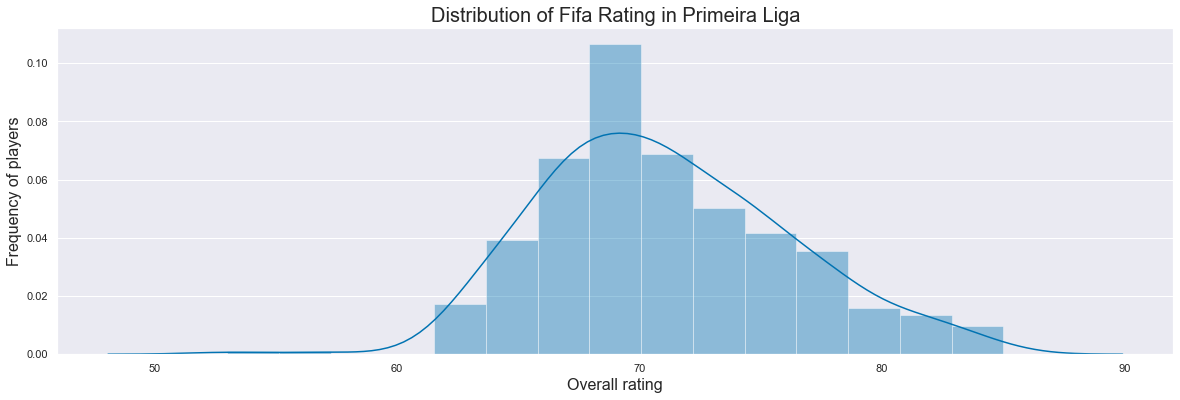

In [267]:
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = primeira_liga.Overall
plt.figure(figsize=(20,6))
ax = sns.distplot(x, bins = 15, kde = True, color='b')
ax.set_xlabel(xlabel="Overall rating", fontsize=16)
ax.set_ylabel(ylabel='Frequency of players', fontsize=16)
ax.set_title(label='Distribution of Fifa Rating in Primeira Liga', fontsize=20)
ax.yaxis.grid(True) 
plt.savefig("plt_fifa_rating.png")

plt.show()

- **FC Porto** has the best average team in the leageue, while also holding a few low-rating players - presumably young talents that will develop higher ratings
- **Sporting CP** is known for its well-regard school of talents and the two low outliers are proof of it
- **Portimonense SC** and **Moreirense** which have finished the season in 6th and 12th respectively, have surprisingly high rated players
- **Santa Clara** holds the lowest rated player in Primeira Liga - *E. Williamson* 

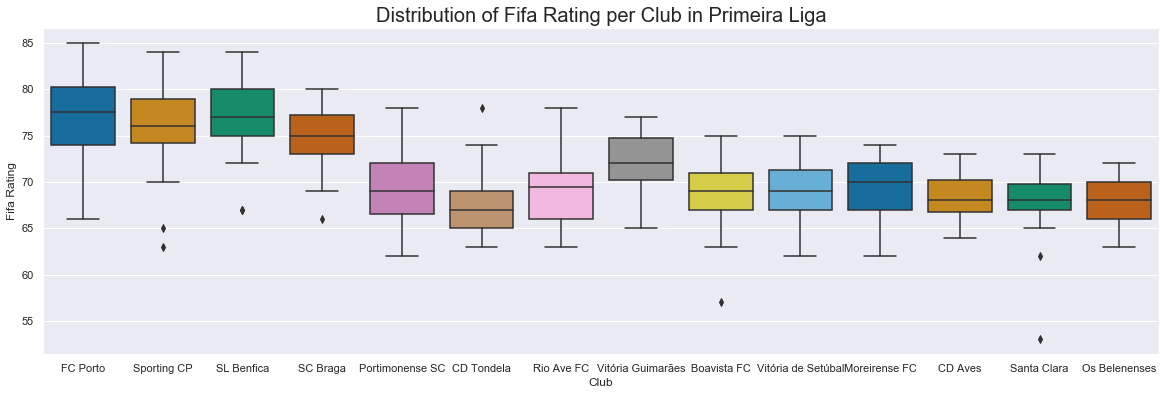

In [268]:
plt.rcParams['figure.figsize'] = (20, 6)
ax = sns.boxplot(x = primeira_liga['Club'], y = primeira_liga['Overall'], palette = 'colorblind')
ax.set_xlabel(xlabel = 'Club', fontsize = 12)
ax.set_ylabel(ylabel = 'Fifa Rating', fontsize = 12)
ax.set_title(label = 'Distribution of Fifa Rating per Club in Primeira Liga', fontsize = 20)
ax.yaxis.grid(True) 
plt.savefig("plt_fifa_rating_primeira_liga.png")


plt.show()

#### 3.3 Distribution of Age in Primeira Liga

In [152]:
avg_age = primeira_liga['Age'].mean().round(2)

print(f'- Most players in Primeira Liga are between 22 and 27 years old')
print(f'- The average age for a player in Primeira Liga is {avg_age}')

- Most players in Primeira Liga are between 22 and 27 years old
- The average age for a player in Primeira Liga is 25.35


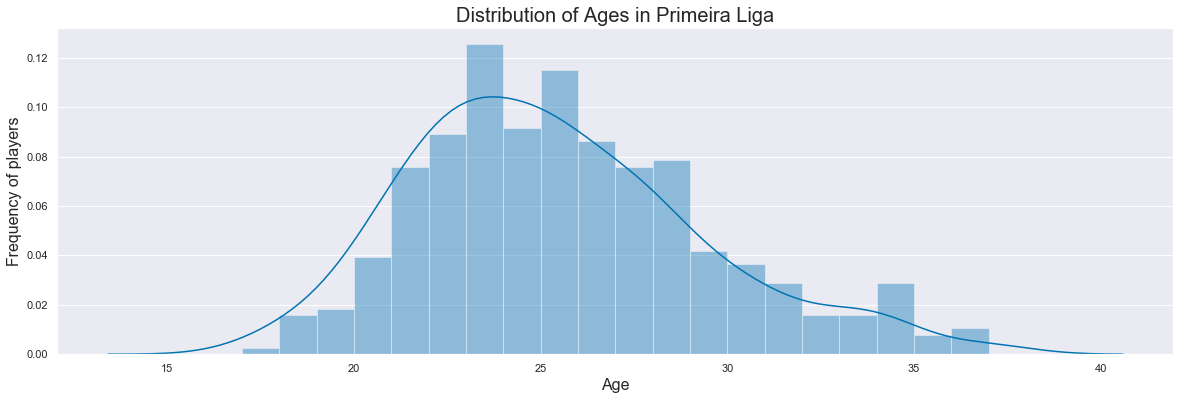

In [269]:
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = primeira_liga.Age
plt.figure(figsize=(20,6))
ax = sns.distplot(x, bins = 20, kde = True, color='b')
ax.set_xlabel(xlabel="Age", fontsize=16)
ax.set_ylabel(ylabel='Frequency of players', fontsize=16)
ax.set_title(label='Distribution of Ages in Primeira Liga', fontsize=20)
ax.yaxis.grid(True) 
plt.savefig("plt_ages.png")


plt.show()

In [148]:
rio_avg = primeira_liga[primeira_liga['Club'] == 'Rio Ave FC']['Age'].mean().round()
vitor_avg = primeira_liga[primeira_liga['Club'] == 'Vitória Guimarães']['Age'].mean().round()

print(f'The violing plot reveals the youngest squads are Rio Ave FC  ({rio_avg}) and Vitória Guimarães ({vitor_avg})')

The violing plot reveals the youngest squads are Rio Ave FC  (24.0) and Vitória Guimarães (25.0)


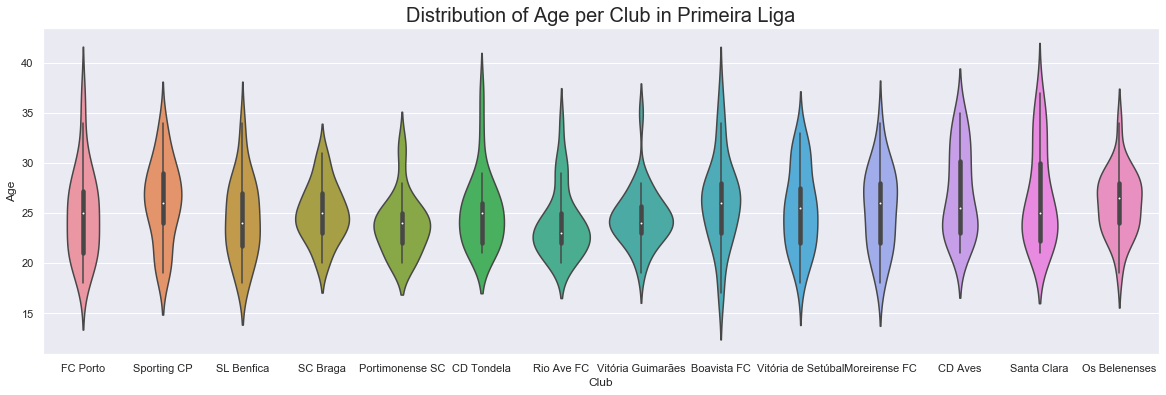

In [270]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 6)
ax = sns.violinplot(x="Club", y="Age", data=primeira_liga);
ax.set_title(label='Distribution of Age per Club in Primeira Liga', fontsize=20);
ax.yaxis.grid(True) 
plt.savefig("plt_ages_primeira_liga.png")


#### 3.4  Visual correlation of Age with other variables

In [ ]:
top5 = ['SL Benfica', 'FC Porto', 'Sporting CP', 'SC Braga', 'Vitória Guimarães']

primeira_liga_5 =  primeira_liga[primeira_liga['Club'].isin(top5)]

While looking at the variability of the Fifa Rating per Age across the TOP5 teams of the league, there are a few conclusions that can be drawn:
    
- The best players are generally between **26-28 years old**
- Sporting's best player - *Bruno Fernandes* - is **younger than his team's average** - 23 vs 26
- By comparisson, FC Porto and SL Benfica's best players are **28 and 34 years old** respectively
- The **oldest player** out of the TOP5 teams is also FCPorto's 5th best player - *Iker Casillas*

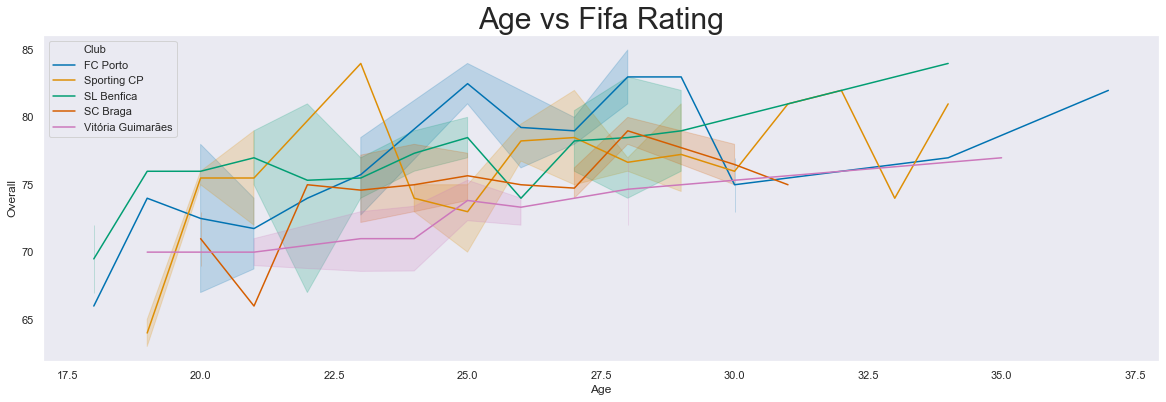

In [271]:
sns.lineplot(primeira_liga_5['Age'], primeira_liga_5['Overall'], hue = primeira_liga_5['Club'])
plt.title('Age vs Fifa Rating', fontsize = 30)
plt.savefig("plt_age_vs_fifa_rating.png")

plt.show()

While looking at the Age vs Potential across the same TOP5 teams, the tables seem to turn since:

- The **youngest** players have the **highest** potential - which is alligned with reality
- *Bruno Fernandes* - from Sporting CP is also the player with the highest potential among the TOP5 teams
- The 3 best clubs have the players with **highest potential** - *FC Porto, SL Benfica and Sporting CP* - which shows their investment on future generations
- The plot ilustrates how the player's potential **drastically drops** after 26-28 years old, since most achieve their peak performance at that age

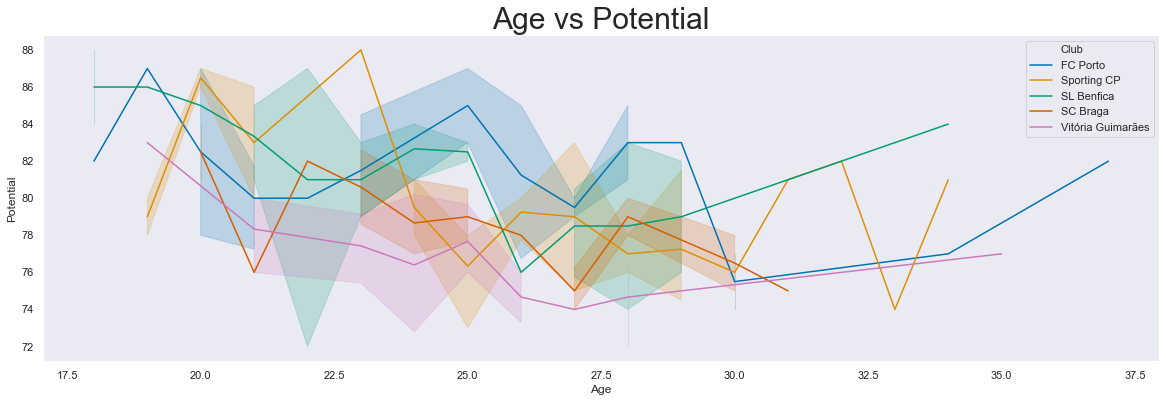

In [272]:
primeira_liga_5 =  primeira_liga[primeira_liga['Club'].isin(top5)]

sns.lineplot(primeira_liga_5['Age'], primeira_liga_5['Potential'], hue = primeira_liga_5['Club'])
plt.title('Age vs Potential', fontsize = 30)
plt.savefig("plt_age_vs_potential.png")


plt.show()

#### 3.5  Visual correlation of Fifa Rating with other variables

In [229]:
avg_value= (primeira_liga['Clean_Value'].mean()/1000000).round(2)
corr = primeira_liga_5['Clean_Value'].corr(primeira_liga['Overall']).round(2)

print(f'- As proven before, most players rating orbits around 65-75 and are specially concentrated in 68-70')
print(f'- The average value of a player in Primeira Liga is {avg_value}M€')
print(f'- Fifa rating and the player value have a correlation of {corr}')

- As proven before, most players rating orbits around 65-75 and are specially concentrated in 68-70
- The average value of a player in Primeira Liga is 4.46M€
- Fifa rating and the player value have a correlation of 0.82


The following scatter plot ilustrates how the Value of the players in Primeira Liga is distributed across the different ratings:
    
- FC Porto, SL Benfica and Sporting CP hold the **most valuable players**
- FC Porto's Iker Casillas (82) and Sporting CP's J. Mathieu (81) are worth **only 1.1M€ and 5.5M€** - due to their older age of 37 and 34
- The **positive correlation** between the two variables is quite visible

In [228]:
primeira_liga_5['Clean_Value'].corr(primeira_liga['Overall']).round(2)

0.82

In [273]:
fig = px.scatter(primeira_liga_5, 
                 x=primeira_liga_5['Clean_Value'], 
                 y=primeira_liga_5['Overall'], 
                 color=primeira_liga_5['Club'])

fig.update_layout(title_text='Fifa Rating vs Value', title_x=0.5)
plt.savefig("fifa_vs_value.png")


fig.show()

<Figure size 1440x432 with 0 Axes>

In [233]:
avg_wage= (primeira_liga['Clean_Wage'].mean()/100000).round(3)
corr = primeira_liga_5['Clean_Wage'].corr(primeira_liga['Overall']).round(3)

print(f'- The average wage of a player in Primeira Liga is {avg_value}K€')
print(f'- Fifa rating and the player wage have a correlation of {corr}')

- The average wage of a player in Primeira Liga is 4.46K€
- Fifa rating and the player wage have a correlation of 0.604


- Stefano Sturaro (Sporting CP - Juventus), Jorge Moraes (FC Porto-AS Monaco), R. Bazoer (FC Porto-VfL Wolfsburg) and Ailton (SC Braga - VfB Stuttgart) are the **four highest outliers** due to being loaned from leagues outside of Portugal
- Y. Brahimi (FC Porto) is the **highest paid owned player** in the Primeira Liga
- Since most clubs have different salaries for players with the same Fifa rating, the correlation is **not as strong** as with their Value


In [274]:
fig = px.scatter(primeira_liga_5, 
                 x=primeira_liga_5['Clean_Wage'], 
                 y=primeira_liga_5['Overall'], 
                 color=primeira_liga_5['Club'])

fig.update_layout(title_text='Fifa Rating vs Wage', title_x=0.5)
plt.savefig("fifa_rating_vs_wage.png")


fig.show()

<Figure size 1440x432 with 0 Axes>

The map reveals that the **highest ranked players** in Primeira Liga are from: 
    
    
- Algeria (Y. Brahimi - 85) 
- Brazil (Alex Telles - 84), 
- Portgual (Bruno Fernandes - 84) 
- Netherlands (Bas Dost - 83)
- Uruguay (Sebastián Coates - 82)


In [275]:
fifa_primeira = pd.DataFrame(primeira_liga.groupby('Nationality')['Overall'].sum().reset_index())

trace = [go.Choropleth(
            colorscale = 'YlOrRd',
            locationmode = 'country names',
            locations = primeira_liga['Nationality'],
            text = primeira_liga['Nationality'],
            z = primeira_liga['Overall'],)]

fig = go.Figure(data = trace, layout = layout)
fig.update_layout(title_text='Fifa Rating vs Nationality', title_x=0.5)
plt.savefig("fifa_rating_vs_nationality.png")


py.iplot(fig)

<Figure size 1440x432 with 0 Axes>